In [1]:
import numpy as np
import pandas as pd
import cnn
from matplotlib import pyplot as plt

train_file = 'train.csv'
test_file = 'test.csv'
dataset = pd.read_csv(train_file)
# test_dataset = pd.read_csv(test_file)

#Set hyperparameters
layers = 2
nodes_per_layer = 16

In [2]:
m, n = dataset.shape
sample_size = m
input_features = n - 1
print("Input_features:", input_features)

dataset = np.array(dataset)
np.random.shuffle(dataset)

train_dataset = dataset[0:1000]
y_test = train_dataset[:, 0]
x_test = train_dataset.transpose()[1:1000] #(input_features, sample_size)

train_dataset = dataset[1000: sample_size]
y_train = train_dataset[:, 0]
x_train = train_dataset.transpose()[1:1000]
x_train = x_train / 255

print("x_train:", x_train.shape)
print("y_train:", y_train.shape)
print("x_test:", x_test.shape)
print("y_test:", y_test.shape)

Input_features: 784
x_train: (784, 41000)
y_train: (41000,)
x_test: (784, 1000)
y_test: (1000,)


In [3]:
# w1, b1, w2, b2, w3, b3 = cnn.initParams(input_features, 16)
# z1, a1, z2, a2, z3, a3 = cnn.forw_prop(w1, b1, w2, b2, w3, b3, x_train)

In [4]:
step = 0.1
iteration = 5000
w1, b1, w2, b2, w3, b3 = cnn.gradientDescent(x_train, y_train, iteration, input_features, step)

Iteration: 0
[1 1 8 ... 1 8 7] [0 5 7 ... 9 5 8]
Accuracy: 0.08017073170731707
Iteration: 10
[8 8 8 ... 8 8 8] [0 5 7 ... 9 5 8]
Accuracy: 0.10573170731707318
Iteration: 20
[8 8 8 ... 8 8 8] [0 5 7 ... 9 5 8]
Accuracy: 0.10497560975609757
Iteration: 30
[8 8 8 ... 8 8 8] [0 5 7 ... 9 5 8]
Accuracy: 0.10507317073170733
Iteration: 40
[8 8 8 ... 8 8 8] [0 5 7 ... 9 5 8]
Accuracy: 0.10534146341463416
Iteration: 50
[8 8 8 ... 8 8 8] [0 5 7 ... 9 5 8]
Accuracy: 0.10648780487804879
Iteration: 60
[8 8 8 ... 8 8 8] [0 5 7 ... 9 5 8]
Accuracy: 0.10704878048780489
Iteration: 70
[8 8 8 ... 8 2 8] [0 5 7 ... 9 5 8]
Accuracy: 0.10904878048780488
Iteration: 80
[8 8 8 ... 8 2 8] [0 5 7 ... 9 5 8]
Accuracy: 0.11019512195121951
Iteration: 90
[8 8 8 ... 8 2 8] [0 5 7 ... 9 5 8]
Accuracy: 0.11109756097560976
Iteration: 100
[8 8 8 ... 8 2 8] [0 5 7 ... 9 5 8]
Accuracy: 0.11248780487804878
Iteration: 110
[8 8 8 ... 8 2 8] [0 5 7 ... 9 5 8]
Accuracy: 0.11358536585365854
Iteration: 120
[8 8 8 ... 8 2 8] [0 5 7

KeyboardInterrupt: 

In [ ]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _, _, a3 = cnn.forw_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = cnn.getPrediction(a3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = x_train[:, index, None]
    prediction = make_predictions(x_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [5]
Label:  8


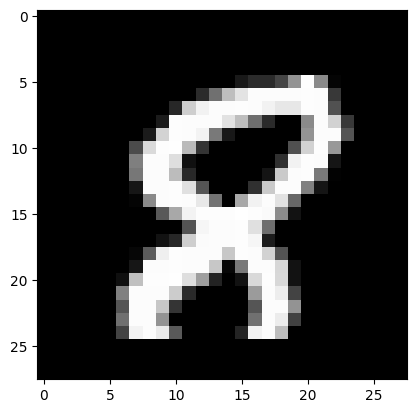

In [ ]:
test_prediction(6969, w1, b1, w2, b2, w3, b3)